In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import math
import numpy as np 

import matplotlib.pyplot as plt

In [2]:
eta = .05
x0 = 5
c_sin = 5
title = '$f(x) = x^2 + %dsin(x)$; ' %c_sin
title += '$x_0 =  %.2f$; ' %x0
title += r'$\eta = %.2f$ ' % eta 
file_name = 'gd_14.gif'
def grad(x):
    return 2*x+ 10*np.cos(x)

def grad2(x):
    return 2 - 10*np.sin(x)

def cost(x):
    return x**2 + 10*np.sin(x)



def GD_newton(x0):
    x = [x0]    
    for it in range(100):
        g1 = grad(x[-1])
        g2 = grad2(x[-1])
        if abs(g2) < 1e-3:
            break
        x_new = x[-1] - g1/grad2(x[-1])
        print(grad(x[-1]))
        x.append(x_new)
    return (x, it)



Simple Newton method with function x^3

In [3]:
x0 = 5

def cost(x):
    return x**2 + 10*np.sin(x)

def grad(x):
    return 2*x + 10*np.cos(x)

def myGD1(x0, eta = 0.1):
    x = [x0]
    for it in range(100):
        x_new = x[-1] - eta*grad(x[-1])
        if abs(grad(x_new)) < 1e-3:
            break
        x.append(x_new)
    x = np.asarray(x)
    return (x, it)

def GD_newton(x0):
    x = [x0]
    for it in range(100):
        if abs(cost(x[-1])) < 1e-6 or abs(grad(x[-1])) < 1e-6:
            break
        x_new = x[-1] - 3*cost(x[-1])/grad(x[-1])
        print(x_new, cost(x[-1]), grad(x[-1]))
        x.append(x_new)
    return (x, it)

def Momentum(x0, eta = 0.1, gamma = 0.9):
    v = [0]
    x = [x0]
    for it in range(100):
        g = grad(x[-1])
        if abs(g) < 1e-6:
            break
        v_new = gamma*v[-1] + eta*g
        x_new = x[-1] - v_new
        v.append(v_new)
        x.append(x_new)
    return (np.asarray(x), v, it)

(x, v, it) = Momentum(5, 0.1, 0.9)
# print(it, x)

# print(GD_newton(x0))

# GD_newton(-10)

def plot_fn(fn, xmin = -5, xmax = 5, xaxis = True, opts = 'b-'):
    x = np.linspace(xmin, xmax, 1000)
    y = fn(x)
    ymin = np.min(y) - .5
    ymax = np.max(y) + .5
    plt.axis([xmin, xmax, ymin, ymax])
    if xaxis:
        x0 = np.linspace(xmin, xmax, 2)
        plt.plot([xmin, xmax], [0, 0], 'k')
    plt.plot(x, y, opts)
# plot_fn(cost, -10, 10)

# plt.show()

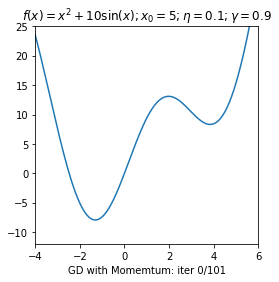

In [4]:
## Momentum example
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation 
def viz_alg_1d(x, cost, filename = 'momentum1d2.gif'):
#     x = x.asarray()
    it = len(x)
    y = cost(x)
    xmin, xmax = np.min(x), np.max(x)
    ymin, ymax = np.min(y), np.max(y)
    
    xmin, xmax = -4, 6
    ymin, ymax = -12, 25
    
    x0 = np.linspace(xmin-1, xmax+1, 1000)
    y0 = cost(x0)
       
    fig, ax = plt.subplots(figsize=(4, 4))  
    
    def update(i):
        ani = plt.cla()
        plt.axis([xmin, xmax, ymin, ymax])
        plt.plot(x0, y0)
        ani = plt.title('$f(x) = x^2 + 10\sin(x); x_0 = 5; \eta = 0.1; \gamma = 0.9$')
        if i == 0:
            ani = plt.plot(x[i], y[i], 'ro', markersize = 7)
        else:
            ani = plt.plot(x[i-1], y[i-1], 'ok', markersize = 7)
            ani = plt.plot(x[i-1:i+1], y[i-1:i+1], 'k-')
            ani = plt.plot(x[i], y[i], 'ro', markersize = 7)
        label = 'GD with Momemtum: iter %d/%d' %(i, it)
        ax.set_xlabel(label)
        return ani, ax 
        
    anim = FuncAnimation(fig, update, frames=np.arange(0, it), interval=200)
    anim.save(filename, dpi = 100, writer = 'imagemagick')
    plt.show()
    
# x = np.asarray(x)
(x, v, it) = Momentum(-5, 0.1, .9)
viz_alg_1d(x, cost)

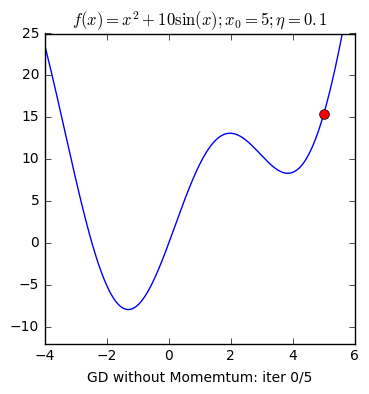

In [67]:
## GD example
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation 
def viz_alg_1d_2(x, cost, filename = 'nomomentum1d.gif'):
#     x = x.asarray()
    it = len(x)
    y = cost(x)
    xmin, xmax = np.min(x), np.max(x)
    ymin, ymax = np.min(y), np.max(y)
    xmin, xmax = -4, 6
    ymin, ymax = -12, 25
    x0 = np.linspace(xmin-1, xmax+1, 1000)
    y0 = cost(x0)
       
    fig, ax = plt.subplots(figsize=(4, 4))  
    
    def update(i):
        ani = plt.cla()
        plt.axis([-4 , 6, -13, 26])
        plt.plot(x0, y0)
        plt.axis([xmin, xmax, ymin, ymax])
        ani = plt.title('$f(x) = x^2 + 10\sin(x); x_0 = 5; \eta = 0.1$')
        if i == 0:
            ani = plt.plot(x[i], y[i], 'ro', markersize = 7)
        else:
            ani = plt.plot(x[i-1], y[i-1], 'ok', markersize = 7)
            ani = plt.plot(x[i-1:i+1], y[i-1:i+1], 'k-')
            ani = plt.plot(x[i], y[i], 'ro', markersize = 7)
        label = 'GD without Momemtum: iter %d/%d' %(i, it)
        ax.set_xlabel(label)
        return ani, ax 
        
    anim = FuncAnimation(fig, update, frames=np.arange(0, it), interval=200)
    anim.save(filename, dpi = 100, writer = 'imagemagick')
    plt.show()
    
# x = np.asarray(x)
(x, it) = myGD1(5, 0.1)
viz_alg_1d_2(x, cost)